<h1 style="color:#725b75; text-align: center"; >Universidad Castro Carazo</h1>
<h4 style="color:#c1a2a0; text-align: center";>2C - 2024 Analisis de datos</h4>
<h4 style="color:#2790b0; text-align: center";>Proyecto</h4>


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sn 
import matplotlib.ticker as mticker

<h4 style="color:#2790b0;">Carga de datos</h4>

In [2]:
#importar data set
columns = [
    "serialNumber", "listYear", "dateRecorded", "town", "address",
    "assessedValue", "saleAmount", "salesRatio", "propertyType",
    "residentialType", "nonUseCode", "assessorRemarks", "opmRemarks", "location"
]
dataSet = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv", names=columns, skiprows=1)

C:\Users\XPC\AppData\Local\Temp\ipykernel_8540\1701987717.py:7: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataSet = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv", names=columns, skiprows=1)


In [3]:
dataSet.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serialNumber     997213 non-null  int64  
 1   listYear         997213 non-null  int64  
 2   dateRecorded     997211 non-null  object 
 3   town             997213 non-null  object 
 4   address          997162 non-null  object 
 5   assessedValue    997213 non-null  float64
 6   saleAmount       997213 non-null  float64
 7   salesRatio       997213 non-null  float64
 8   propertyType     614767 non-null  object 
 9   residentialType  608904 non-null  object 
 10  nonUseCode       289681 non-null  object 
 11  assessorRemarks  149864 non-null  object 
 12  opmRemarks       9934 non-null    object 
 13  location         197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


<h4 style="color:#2790b0;">Tratar valores nulos</h4>

In [5]:
#Ver valores nulos
dfTemp = dataSet.isnull()
for column in dfTemp.columns.values.tolist():
    print(dfTemp[column].value_counts())
    print('')

serialNumber
False    997213
Name: count, dtype: int64

listYear
False    997213
Name: count, dtype: int64

dateRecorded
False    997211
True          2
Name: count, dtype: int64

town
False    997213
Name: count, dtype: int64

address
False    997162
True         51
Name: count, dtype: int64

assessedValue
False    997213
Name: count, dtype: int64

saleAmount
False    997213
Name: count, dtype: int64

salesRatio
False    997213
Name: count, dtype: int64

propertyType
False    614767
True     382446
Name: count, dtype: int64

residentialType
False    608904
True     388309
Name: count, dtype: int64

nonUseCode
True     707532
False    289681
Name: count, dtype: int64

assessorRemarks
True     847349
False    149864
Name: count, dtype: int64

opmRemarks
True     987279
False      9934
Name: count, dtype: int64

location
True     799516
False    197697
Name: count, dtype: int64



In [6]:
#Eliminar observaciones de datos especificos
dataSet.dropna(subset=['dateRecorded'], axis=0, inplace=True)
dataSet.reset_index(drop=['dateRecorded'], inplace=True)

dataSet.dropna(subset=['address'], axis=0, inplace=True)
dataSet.reset_index(drop=['address'], inplace=True)

In [7]:
#Sustituir por moda para null no predominante 
dataSet['propertyType'].value_counts().idxmax()

'Single Family'

In [8]:
dataSet['residentialType'].value_counts().idxmax()

'Single Family'

In [9]:
dataSet['propertyType'].replace(np.nan, 'Single Family', inplace=True)
dataSet['residentialType'].replace(np.nan, 'Single Family', inplace=True)

In [10]:
#Imputación por valor especifico (null predomina)
dataSet['nonUseCode'].fillna('Unknown', inplace=True)
dataSet['assessorRemarks'].fillna('Not Applicable', inplace=True)
dataSet['opmRemarks'].fillna('Not Applicable', inplace=True)
dataSet['location'].fillna('Unknown', inplace=True)

In [11]:
#Revisar valores faltantes
def missing_cols(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    if total == 0:
            print("No hay valores faltantes")

missing_cols(dataSet)

No hay valores faltantes


In [12]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997162 entries, 0 to 997161
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serialNumber     997162 non-null  int64  
 1   listYear         997162 non-null  int64  
 2   dateRecorded     997162 non-null  object 
 3   town             997162 non-null  object 
 4   address          997162 non-null  object 
 5   assessedValue    997162 non-null  float64
 6   saleAmount       997162 non-null  float64
 7   salesRatio       997162 non-null  float64
 8   propertyType     997162 non-null  object 
 9   residentialType  997162 non-null  object 
 10  nonUseCode       997162 non-null  object 
 11  assessorRemarks  997162 non-null  object 
 12  opmRemarks       997162 non-null  object 
 13  location         997162 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


<h4 style="color:#2790b0;">Estandarización de datos</h4>

In [13]:
#Convertir tipos de dato
dataSet['serialNumber'] = dataSet['serialNumber'].astype('int64')
dataSet['listYear'] = dataSet['listYear'].astype('str')
dataSet['dateRecorded'] = pd.to_datetime(dataSet['dateRecorded'])
dataSet['town'] = dataSet['town'].astype('str')
dataSet['address'] = dataSet['address'].astype('str')
dataSet['assessedValue'] = dataSet['assessedValue'].astype('float64')
dataSet['saleAmount'] = dataSet['saleAmount'].astype('float64')
dataSet['salesRatio'] = dataSet['salesRatio'].astype('float64')
dataSet['propertyType'] = dataSet['propertyType'].astype('str')
dataSet['residentialType'] = dataSet['residentialType'].astype('str')
dataSet['nonUseCode'] = dataSet['nonUseCode'].astype('str')
dataSet['assessorRemarks'] = dataSet['assessorRemarks'].astype('str')
dataSet['opmRemarks'] = dataSet['opmRemarks'].astype('str')
dataSet['location'] = dataSet['location'].astype('str')

In [14]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997162 entries, 0 to 997161
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   serialNumber     997162 non-null  int64         
 1   listYear         997162 non-null  object        
 2   dateRecorded     997162 non-null  datetime64[ns]
 3   town             997162 non-null  object        
 4   address          997162 non-null  object        
 5   assessedValue    997162 non-null  float64       
 6   saleAmount       997162 non-null  float64       
 7   salesRatio       997162 non-null  float64       
 8   propertyType     997162 non-null  object        
 9   residentialType  997162 non-null  object        
 10  nonUseCode       997162 non-null  object        
 11  assessorRemarks  997162 non-null  object        
 12  opmRemarks       997162 non-null  object        
 13  location         997162 non-null  object        
dtypes: datetime64[ns](1)

In [15]:
#Revisar valores unicos
def checkUniqueValues(): 
    for column in dataSet.columns:
        print(f"Valores únicos para {column}:")
        print(dataSet[column].unique())
        print()  # Agregar una línea en blanco entre las salidas de cada columna
        
checkUniqueValues()

Valores únicos para serialNumber:
[2020348   20002  200212 ... 1900749 1900695 1910419]

Valores únicos para listYear:
['2020' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019']

Valores únicos para dateRecorded:
<DatetimeArray>
['2021-09-13 00:00:00', '2020-10-02 00:00:00', '2021-03-09 00:00:00',
 '2021-04-13 00:00:00', '2021-07-02 00:00:00', '2020-12-09 00:00:00',
 '2021-03-01 00:00:00', '2021-07-01 00:00:00', '2021-06-04 00:00:00',
 '2020-12-16 00:00:00',
 ...
 '2019-11-30 00:00:00', '2020-09-06 00:00:00', '2019-12-29 00:00:00',
 '2020-03-08 00:00:00', '2020-08-15 00:00:00', '2020-09-13 00:00:00',
 '2020-06-20 00:00:00', '2020-04-12 00:00:00', '2020-03-21 00:00:00',
 '2020-03-07 00:00:00']
Length: 6387, dtype: datetime64[ns]

Valores únicos para town:
['Ansonia' 'Ashford' 'Avon' 'Berlin' 'Bethany' 'Bethel' 'Bethlehem'
 'Bloomfield' 'Branford' 'Bristol' 'Brookfield' 'Canaan' 'Canton'
 'Cheshire' 'Ches

In [16]:
#Limpieza necesaria
dataSet['town'].replace('***Unknown***', 'Unknown', inplace=True)
dataSet['saleAmount'] = dataSet['saleAmount'].round(2)
dataSet['salesRatio'] = dataSet['salesRatio'].round(2)
dataSet['assessedValue'] = dataSet['assessedValue'].round(2)


In [17]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997162 entries, 0 to 997161
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   serialNumber     997162 non-null  int64         
 1   listYear         997162 non-null  object        
 2   dateRecorded     997162 non-null  datetime64[ns]
 3   town             997162 non-null  object        
 4   address          997162 non-null  object        
 5   assessedValue    997162 non-null  float64       
 6   saleAmount       997162 non-null  float64       
 7   salesRatio       997162 non-null  float64       
 8   propertyType     997162 non-null  object        
 9   residentialType  997162 non-null  object        
 10  nonUseCode       997162 non-null  object        
 11  assessorRemarks  997162 non-null  object        
 12  opmRemarks       997162 non-null  object        
 13  location         997162 non-null  object        
dtypes: datetime64[ns](1)

In [18]:
checkUniqueValues()

Valores únicos para serialNumber:
[2020348   20002  200212 ... 1900749 1900695 1910419]

Valores únicos para listYear:
['2020' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019']

Valores únicos para dateRecorded:
<DatetimeArray>
['2021-09-13 00:00:00', '2020-10-02 00:00:00', '2021-03-09 00:00:00',
 '2021-04-13 00:00:00', '2021-07-02 00:00:00', '2020-12-09 00:00:00',
 '2021-03-01 00:00:00', '2021-07-01 00:00:00', '2021-06-04 00:00:00',
 '2020-12-16 00:00:00',
 ...
 '2019-11-30 00:00:00', '2020-09-06 00:00:00', '2019-12-29 00:00:00',
 '2020-03-08 00:00:00', '2020-08-15 00:00:00', '2020-09-13 00:00:00',
 '2020-06-20 00:00:00', '2020-04-12 00:00:00', '2020-03-21 00:00:00',
 '2020-03-07 00:00:00']
Length: 6387, dtype: datetime64[ns]

Valores únicos para town:
['Ansonia' 'Ashford' 'Avon' 'Berlin' 'Bethany' 'Bethel' 'Bethlehem'
 'Bloomfield' 'Branford' 'Bristol' 'Brookfield' 'Canaan' 'Canton'
 'Cheshire' 'Ches

<h4 style="color:#2790b0;">Visualización de datos</h4>

In [19]:
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

In [20]:
def plot_bar_chart(x, y, title, subtitle, xlabel, ylabel, colors, save_path, x_format=None, y_format=None):
    fig, ax = plt.subplots(1, 1, figsize=(15, 6.9), dpi=100)

    # Graficar las barras horizontales
    ax.barh(x, y, color=colors)

    # Formato del gráfico
    plt.suptitle(title,
                 horizontalalignment='left',
                 x=0.001,
                 y=0.87,
                 transform=fig.transFigure,
                 fontsize=20,
                 fontweight='bold',
                 fontfamily='serif')

    ax.set_title(subtitle,
                 ha='left',
                 x=0.001,
                 y=0.80,
                 transform=fig.transFigure,
                 fontsize=12,
                 fontweight='regular',
                 fontfamily='serif')

    ax.set_xlabel(xlabel,
                  ha='left',
                  fontsize=10,
                  fontweight='regular',
                  fontfamily='serif')

    ax.set_ylabel(ylabel,
                  ha='left',
                  fontsize=10,
                  fontweight='regular',
                  fontfamily='serif')

    # Ajustar el formato del eje x si se proporciona
    if x_format:
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(x_format))

    # Ajustar el formato del eje y si se proporciona
    if y_format:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(y_format))

    plt.subplots_adjust(top=0.80)
    plt.savefig(save_path)
    plt.show()

In [21]:
def generate_bar_colors(values, color_highest, color_lowest, color_default):
    num_bars = len(values)
    if num_bars == 0:
        return []

    # Inicializar colores con el color por defecto
    bar_colors = [color_default] * num_bars

    # Identificar el índice de la barra más alta y la más baja
    max_index = values.index(max(values))  # Índice de la barra con el valor más alto
    min_index = values.index(min(values))  # Índice de la barra con el valor más bajo

    # Asignar colores
    bar_colors[max_index] = color_highest  # Color para la barra más alta
    bar_colors[min_index] = color_lowest  # Color para la barra más baja

    return bar_colors

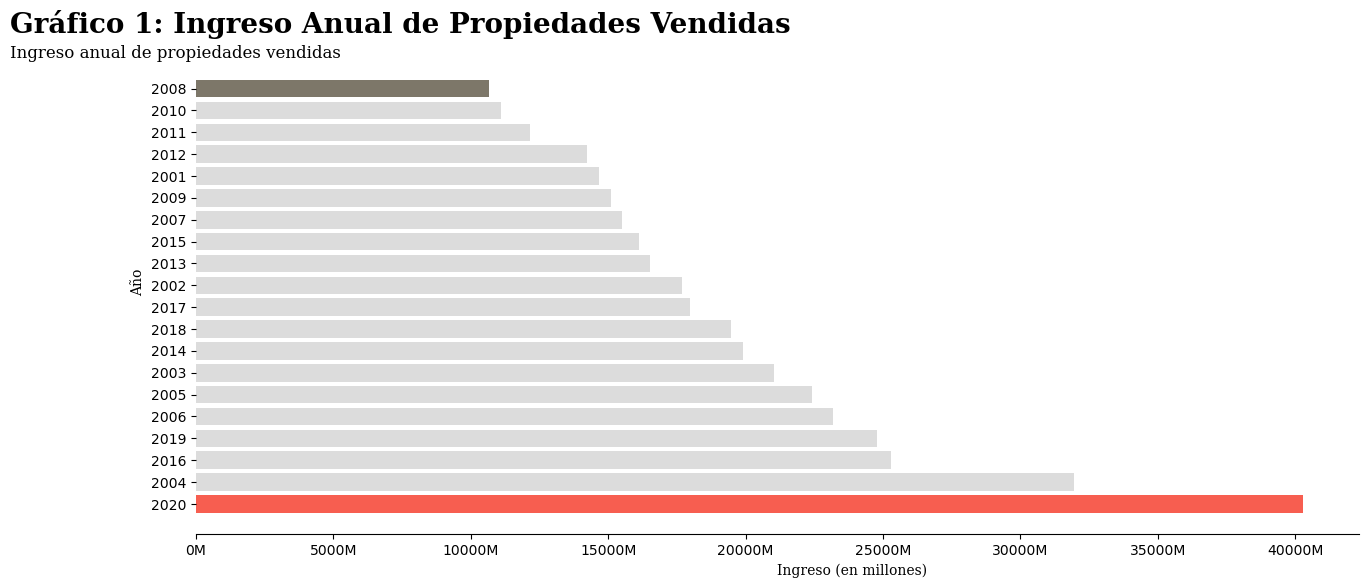

In [22]:
#¿Cuál es el ingreso anual de las propiedades vendidas?
dfg = dataSet.groupby('listYear')['saleAmount'].sum().reset_index()
dfg = dfg.sort_values(by='saleAmount', ascending=False)

years = dfg['listYear'].tolist()  
income = dfg['saleAmount'].tolist()

plot_bar_chart(x=years,
               y=income,
               title='Gráfico 1: Ingreso Anual de Propiedades Vendidas',
               subtitle='Ingreso anual de propiedades vendidas',
               xlabel='Ingreso (en millones)',
               ylabel='Año',
               colors=generate_bar_colors(income,'#f75e50','#7d7769','#DCDCDC'),
               save_path='Graf1.png',
               x_format=lambda x, _: f'{x / 1e6:.0f}M')

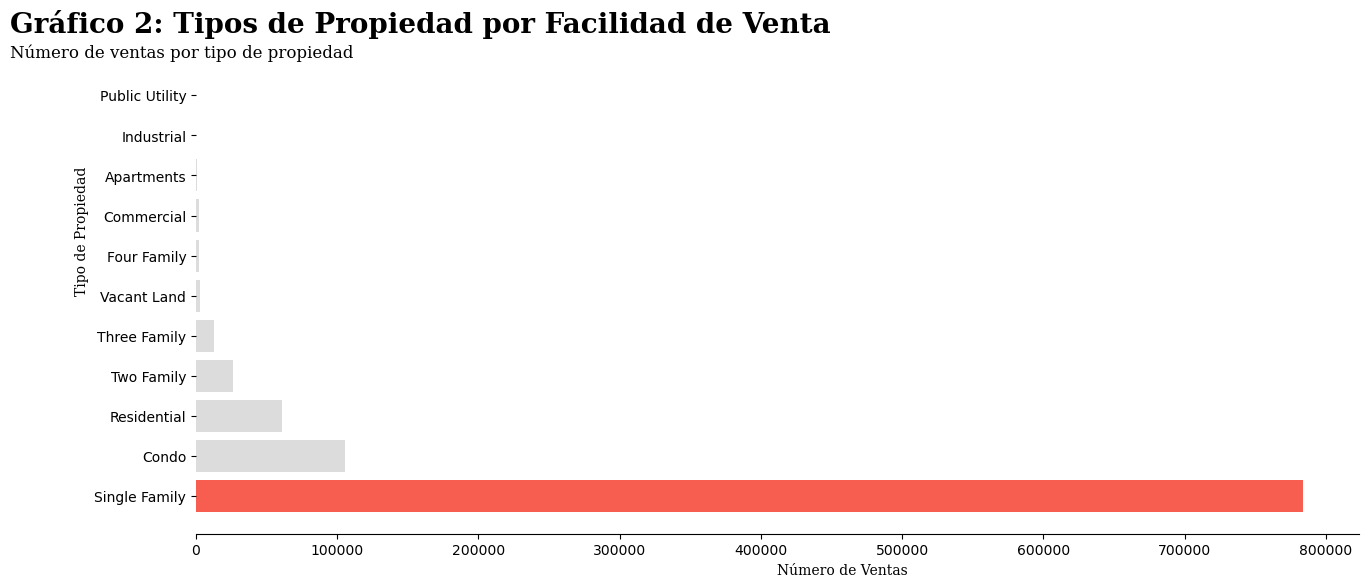

In [23]:
#¿Qué tipo de propiedad tiene mayor facilidad de venta?
dfg = dataSet.groupby('propertyType').size().reset_index(name='count')
dfg = dfg.sort_values(by='count', ascending=False)

property_types = dfg['propertyType'].tolist()
counts = dfg['count'].tolist()

plot_bar_chart(x=property_types,
               y=counts,
               title='Gráfico 2: Tipos de Propiedad por Facilidad de Venta',
               subtitle='Número de ventas por tipo de propiedad',
               xlabel='Número de Ventas',
               ylabel='Tipo de Propiedad',
               colors=generate_bar_colors(counts, '#f75e50', '#7d7769', '#DCDCDC'),
               save_path='Graf2.png')

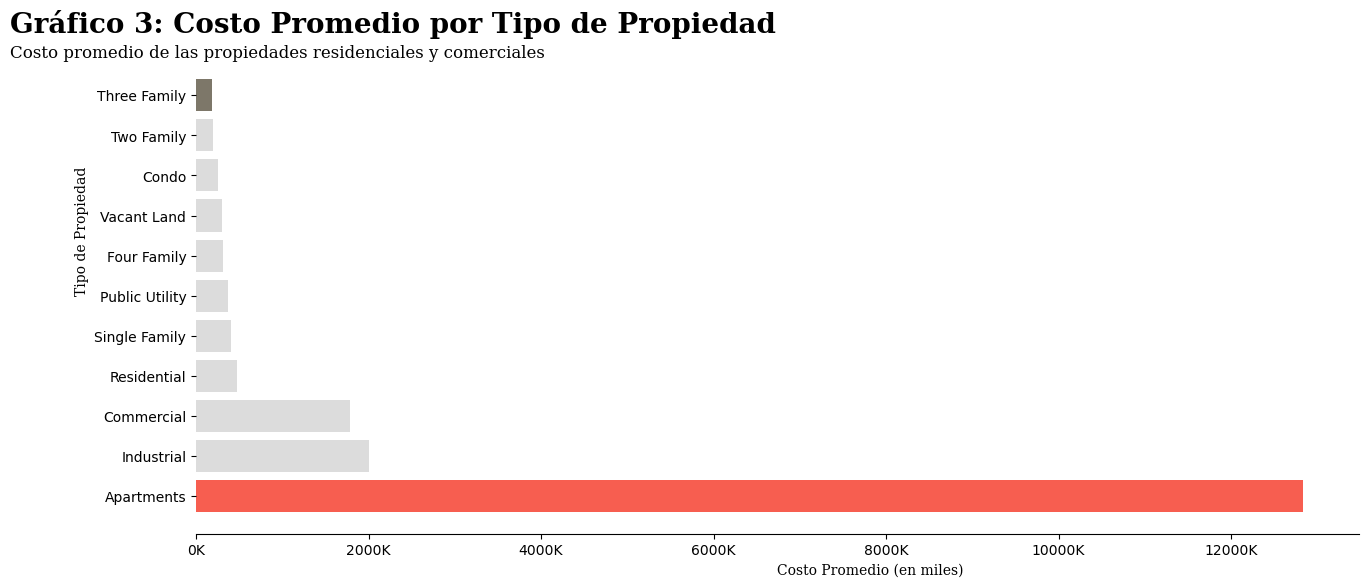

In [24]:
# ¿Cuál es el costo promedio de las propiedades residenciales y comerciales?
dfg = dataSet.groupby('propertyType')['saleAmount'].mean().reset_index()
dfg = dfg.sort_values(by='saleAmount', ascending=False)

property_types = dfg['propertyType'].tolist()
avg_costs = dfg['saleAmount'].tolist()

plot_bar_chart(x=property_types,
               y=avg_costs,
               title='Gráfico 3: Costo Promedio por Tipo de Propiedad',
               subtitle='Costo promedio de las propiedades residenciales y comerciales',
               xlabel='Costo Promedio (en miles)',
               ylabel='Tipo de Propiedad',
               colors=generate_bar_colors(avg_costs, '#f75e50', '#7d7769', '#DCDCDC'),
               save_path='Graf3.png',
               x_format=lambda x, _: f'{x/1e3:.0f}K')

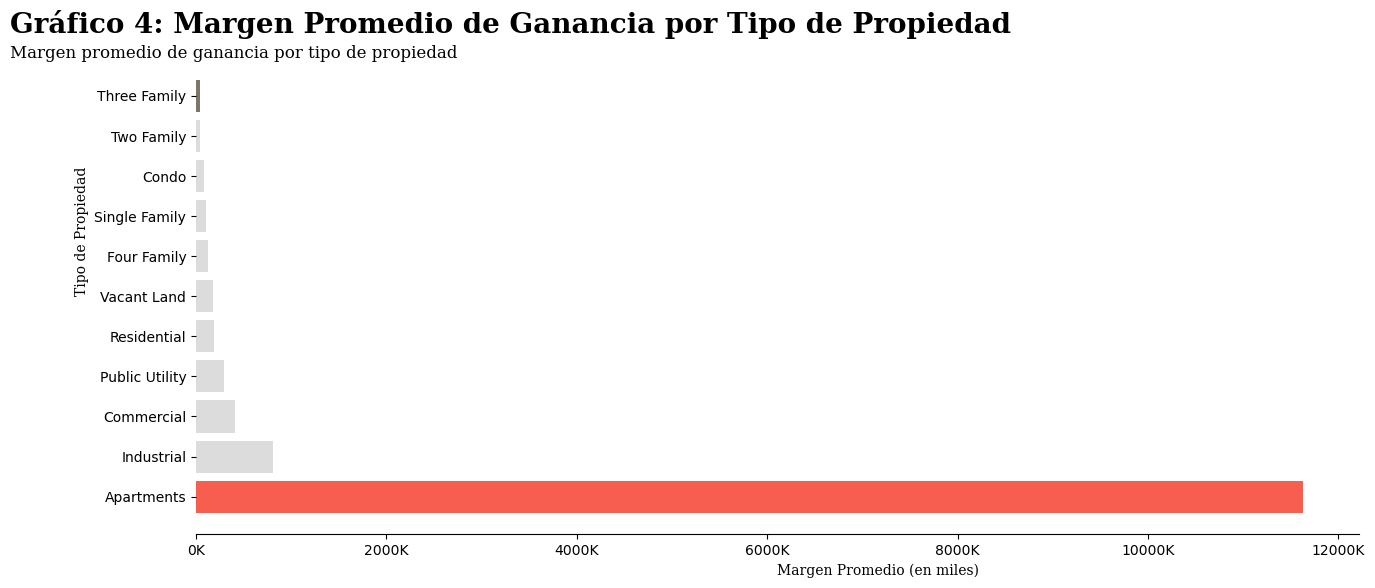

In [25]:
#¿Cuál es el margen promedio de ganancia por cada una de las propiedades vendidas?
dataSet['profitMargin'] = dataSet['saleAmount'] - dataSet['assessedValue']

dfg = dataSet.groupby('propertyType')['profitMargin'].mean().reset_index()
dfg = dfg.sort_values(by='profitMargin', ascending=False)

property_types = dfg['propertyType'].tolist()
avg_margins = dfg['profitMargin'].tolist()

plot_bar_chart(x=property_types,
               y=avg_margins,
               title='Gráfico 4: Margen Promedio de Ganancia por Tipo de Propiedad',
               subtitle='Margen promedio de ganancia por tipo de propiedad',
               xlabel='Margen Promedio (en miles)',
               ylabel='Tipo de Propiedad',
               colors=generate_bar_colors(avg_margins, '#f75e50', '#7d7769', '#DCDCDC'),
               save_path='Graf4.png',
               x_format=lambda x, _: f'{x/1e3:.0f}K')